# EE58A Julia Workshop 2 - 11.5.2021 

### Author: Utku Türbey
Contanct: utku.turkbey@boun.edu.tr(primary) - turkbey.utku@gmail.com(secondary)

### Most of the content of this notebook is derived from the "Intro to Julia" tutorials of Jane Herriman posted in julialang.org and related Github/Youtube pages.

#### Related links for the content:

"Intro to Julia" Tutorial Video by Jane Herriman:
https://youtu.be/8h8rQyEpiZA

"Intro to Julia" Jupyter Notebooks by Jane Herriman:
https://github.com/JuliaAcademy/JuliaTutorials/tree/main/introductory-tutorials/intro-to-julia



## Contents:
#### 1)Packages
#### 2) Plotting
#### 3) Julia is Fast
#### 4) Multiple Dispatch
#### 5) Basic Linear Algebra

# 1) Packages

Julia has over 2000 registered packages, making packages a huge part of the Julia ecosystem.

Even so, the package ecosystem still has some growing to do. Notably, we have first class function calls  to other languages, providing excellent foreign function interfaces. We can easily call into python or R, for example, with `PyCall` or `Rcall`.

This means that you don't have to wait until the Julia ecosystem is fully mature, and that moving to Julia doesn't mean you have to give up your favorite package/library from another language! 


To see a basic tutorial for using PyCall, check out  https://youtu.be/OO2SBcAilPs

To see the GitHub repo of PyCall.jl, check out  https://github.com/JuliaPy/PyCall.jl

To see all available packages in Julia, check out  https://julialang.org/packages/


The first time you use a package on a given Julia installation, you need to use the package manager to explicitly add it:

In [ ]:
#using Pkg
#Pkg.add("Example")

Every time you use Julia (start a new session or open a notebook for the first time), you load the package with the `using` keyword

In [ ]:
using Example

In the source code of `Example.jl` at
https://github.com/JuliaLang/Example.jl/blob/master/src/Example.jl
we see the following function declared

```
hello(who::String) = "Hello, $who"
```

Having loaded `Example`, we should now be able to call `hello`

In [ ]:
hello("it's me. I was wondering if after all these years you'd like to meet.")

Now let's play with the Colors package

In [ ]:
#Pkg.add("Colors")

In [ ]:
using Colors

Let's create a palette of 100 different colors

In [ ]:
palette = distinguishable_colors(100)

and then we can create a randomly checkered matrix using the `rand` command

In [ ]:
rand(palette, 3, 3)

# 2) Plotting

## Basics
There are a few different ways to plot in Julia (including calling PyPlot). <br>

Here we'll show you how to use `Plots.jl`.  If it's not installed yet, you need to use the package manager to install it, and Julia will precompile it for you the first time you use it:

In [ ]:
#using Pkg
#Pkg.add("Plots")
using Plots

One of the advantages to `Plots.jl` is that it allows you to seamlessly change backends. In this notebook, we'll try out the `gr()` and `plotlyjs()` backends.<br>

In the name of scientific inquiry, let's use this notebook to examine the relationship between the global temperature and the number of pirates between roughly 1860 and 2000.

In [ ]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17];

Plots supports multiple backends — that is, libraries that actually do the drawing — all with the same API. To start out, let's try the GR backend.  You choose it with a call to `gr()`:

In [ ]:
gr()

and now we can use commands like `plot` and `scatter` to generate plots.

In [ ]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 

The `!` at the end of the `scatter!` function name makes `scatter!` a mutating function, indicating that the scattered points will be added onto the pre-existing plot.

In contrast, see what happens when you replace `scatter!` in the above with the non-mutating function `scatter`.

Next, let's update this plot with the `xlabel!`, `ylabel!`, and `title!` commands to add more information to our plot.

In [ ]:
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

This still doesn't look quite right. The number of pirates has decreased since 1860, so reading the plot from left to right is like looking backwards in time rather than forwards. Let's flip the x axis to better see how pirate populations have caused global temperatures to change over time!

In [ ]:
xflip!()

**Without changing syntax, we can create this plot with the PyPlot backend**

In [ ]:
#Pkg.add("PyPlot")
#using PyPlot
pyplot()

In [ ]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of pirate population on global warming")

### Exercise
 
Given
```julia
x = -10:10
```
plot x vs. y for $y = x^2$.  You may want to change backends back again.

and then create a $2x2$ and  $4x1$ plots using layout that shows `p1 = x vs x`, `p2 = x vs x^2`, `p3 = x vs x^3`, and `p4 = x vs x^4` as subplots.

# 3) Julia is fast

Very often, benchmarks are used to compare languages.

The purpose of this section is for you to see a simple benchmark for yourself. 

!!!Performance of these functions are highly dependent on the hardware of the computer being used. 

(As noted by Jane Harriman: This material began life as a wonderful lecture by Steven Johnson at MIT: https://github.com/stevengj/18S096/blob/master/lectures/lecture1/Boxes-and-registers.ipynb.)

## Outline 

- Define the sum function
- Implementations & benchmarking of sum in...
    - C (hand-written)
    - C (hand-written with -ffast-math)
    - python (built-in)
    - python (numpy)
    - python (hand-written)
    - Julia (built-in)
    - Julia (hand-written)
    - Julia (hand-written with SIMD)
- Summary of benchmarks

## `sum`: An easy enough function to understand

Consider the  **sum** function `sum(a)`, which computes
$$
\mathrm{sum}(a) = \sum_{i=1}^n a_i,
$$
where $n$ is the length of `a`.

In [ ]:
a = rand(10^7) # 1D vector of random numbers, uniform on [0,1)

In [ ]:
sum(a)

The expected result is 0.5 * 10^7, since the mean of each entry is 0.5

## Benchmarking a few ways in a few languages

### Macros and Expressions

Geeksforgeeks (long)summary: https://www.geeksforgeeks.org/expressions-and-macros-in-julia/

julialang.org documentation for Macros inside Metaprogramming section:  https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros

In [ ]:
@time sum(a)

In [ ]:
@time sum(a)

In [ ]:
@time sum(a)

The `@time` macro can yield noisy results, so it's not our best choice for benchmarking!

Luckily, Julia has a `BenchmarkTools.jl` package to make benchmarking easy and accurate:

In [ ]:
#using Pkg
#Pkg.add("BenchmarkTools")

In [ ]:
using BenchmarkTools  

##  1. The C language

C is often considered the gold standard: difficult on the human, nice for the machine. Getting within a factor of 2 of C is often satisfying. Nonetheless, even within C, there are many kinds of optimizations possible that a naive C writer may or may not get the advantage of.

The current author does not speak C, so he does not read the cell below, but is happy to know that you can put C code in a Julia session, compile it, and run it. Note that the `"""` wrap a multi-line string.

In [ ]:
using Libdl
C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file


# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -fPIC -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [ ]:
c_sum(a)

4.999993858967344e6

In [ ]:
c_sum(a) ≈ sum(a) # type \approx and then <TAB> to get the ≈ symbolb

true

In [ ]:
c_sum(a) - sum(a)  

2.3189932107925415e-7

In [ ]:
≈  # alias for the `isapprox` function

isapprox (generic function with 8 methods)

In [ ]:
?isapprox

We can now benchmark the C code directly from Julia:

In [ ]:
c_bench = @benchmark c_sum(a)

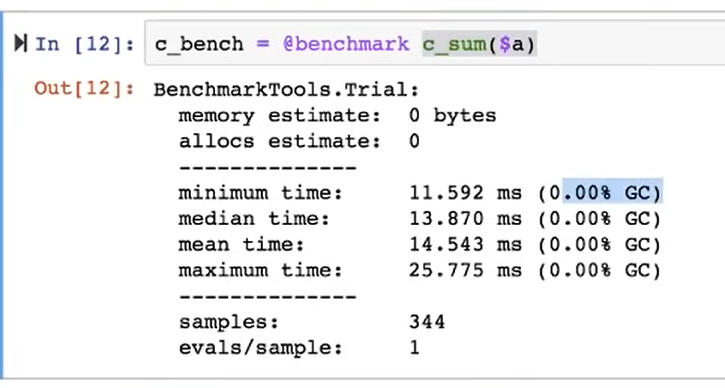

In [ ]:
println("C: Fastest time was $(minimum(c_bench.times) / 1e6) msec")

C: Fastest time was 11.592029 msec

In [ ]:
d = Dict()  # a "dictionary", i.e. an associative array
d["C"] = minimum(c_bench.times) / 1e6  # in milliseconds
d

Dict {Any,Any} with 1 entry:

"C"=> 11.592 

In [ ]:
using Plots
gr()

In [ ]:
using Statistics # bring in statistical support for standard deviations
t = c_bench.times / 1e6 # times in milliseconds
m, σ = minimum(t), std(t)

histogram(t, bins=500,
    xlim=(m - 0.01, m + σ),
    xlabel="milliseconds", ylabel="count", label="")

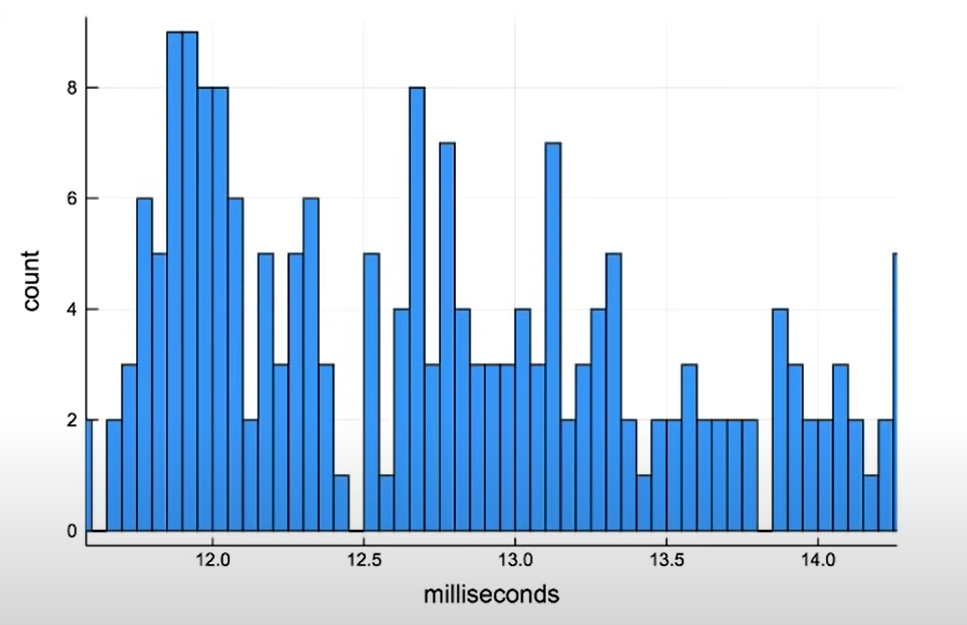

## 2. C with -ffast-math

If we allow C to re-arrange the floating point operations, then it'll vectorize with SIMD (single instruction, multiple data) instructions.

In [ ]:
const Clib_fastmath = tempname()   # make a temporary file

# The same as above but with a -ffast-math flag added
open(`gcc -fPIC -O3 -msse3 -xc -shared -ffast-math -o $(Clib_fastmath * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum_fastmath(X::Array{Float64}) = ccall(("c_sum", Clib_fastmath), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum_fastmath (generic function with 1 method)

In [ ]:
c_fastmath_bench = @benchmark c_sum_fastmath(a)

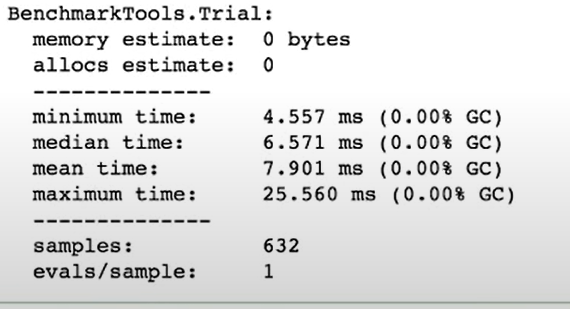

In [ ]:
d["C -ffast-math"] = minimum(c_fastmath_bench.times) / 1e6  # in milliseconds

4.557073

## 3. Python's built in `sum` 

The `PyCall` package provides a Julia interface to Python:

In [ ]:
# using Pkg; Pkg.add("PyCall")
using PyCall

In [ ]:
# get the Python built-in "sum" function:
pysum = pybuiltin("sum")

In [ ]:
pysum(a)

In [ ]:
pysum(a) ≈ sum(a)

In [ ]:
py_list_bench = @benchmark pysum(a)

In [ ]:
d = Dict()
d["Python built-in"] = minimum(py_list_bench.times) / 1e6
d

## 4. Python: `numpy` 

## Takes advantage of hardware "SIMD", but only works when it works.

`numpy` is an optimized C library, callable from Python.
It may be installed within Julia as follows:

In [ ]:
# using Pkg; Pkg.add("Conda")
using Conda

In [ ]:
# Conda.add("numpy")

In [ ]:
numpy_sum = pyimport("numpy")["sum"]

py_numpy_bench = @benchmark numpy_sum(a)

In [ ]:
numpy_sum(a)

In [ ]:
numpy_sum(a) ≈ sum(a)

In [ ]:
d["Python numpy"] = minimum(py_numpy_bench.times) / 1e6
d

## 5. Python, hand-written 

In [ ]:
py"""
def py_sum(A):
    s = 0.0
    for a in A:
        s += a
    return s
"""

sum_py = py"py_sum"

In [ ]:
py_hand = @benchmark sum_py(a)

In [ ]:
sum_py(a)

In [ ]:
sum_py(a) ≈ sum(a)

In [ ]:
d["Python hand-written"] = minimum(py_hand.times) / 1e6
d

## 6. Julia (built-in) 

## Written directly in Julia, not in C!

In [ ]:
@which sum(a)

In [ ]:
j_bench = @benchmark sum(a)

In [ ]:
d["Julia built-in"] = minimum(j_bench.times) / 1e6
d

## 7. Julia (hand-written) 

In [ ]:
function mysum(A)   
    s = 0.0 # s = zero(eltype(a))
    for a in A
        s += a
    end
    s
end

In [ ]:
j_bench_hand = @benchmark mysum(a)

In [ ]:
d["Julia hand-written"] = minimum(j_bench_hand.times) / 1e6
d

## 8. Julia (hand-written w. simd) 

In [ ]:
function mysum_simd(A)   
    s = 0.0 # s = zero(eltype(A))
    @simd for a in A
        s += a
    end
    s
end

In [ ]:
j_bench_hand_simd = @benchmark mysum_simd(a)

In [ ]:
mysum_simd(a)

In [ ]:
d["Julia hand-written simd"] = minimum(j_bench_hand_simd.times) / 1e6
d

## Summary

In [ ]:
for (key, value) in sort(collect(d), by=last)
    println(rpad(key, 25, "."), lpad(round(value; digits=1), 6, "."))
end

### Result of Jane Harriman
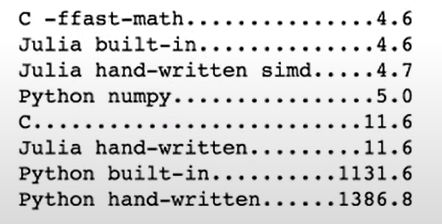

# 4) Multiple dispatch

Multiple dispatch makes software *generic* and *fast*!

### Some links for better understanding
Dynamic vs static typing: https://docs.oracle.com/cd/E57471_01/bigData.100/extensions_bdd/src/cext_transform_typing.html#:~:text=First%2C%20dynamically%2Dtyped%20languages%20perform,type%20checking%20at%20compile%20time.&text=If%20a%20script%20written%20in,the%20errors%20have%20been%20fixed.

Single Dispatch vs Multiple Dispatch:
https://eli.thegreenplace.net/2016/a-polyglots-guide-to-multiple-dispatch/#:~:text=The%20decision%20which%20function%20to,runtime%20types%20of%20multiple%20objects.

Multiple Dispatch vs Method Overloading:
https://stackoverflow.com/questions/1801216/what-is-the-difference-between-multiple-dispatch-and-method-overloading

#### Starting with the familiar

To understand multiple dispatch in Julia, let's start with what we've already seen.

We can declare functions in Julia without giving Julia any information about the types of the input arguments that function will receive:

In [ ]:
f(x) = x^2

and then Julia will determine on its own which input argument types make sense and which do not:

In [ ]:
f(10)

In [ ]:
f([1, 2, 3])

#### Specifying the types of our input arguments

However, we also have the *option* to tell Julia explicitly what types our input arguments are allowed to have.

For example, let's write a function `foo` that only takes strings as inputs.

In [ ]:
foo(x::String, y::String) = println("My inputs x and y are both strings!")

We see here that in order to restrict the type of `x` and `y` to `String`s, we just follow the input argument name by a double colon and the keyword `String`.

Now we'll see that `foo` works on `String`s and doesn't work on other input argument types.

In [ ]:
foo("hello", "hi!")

In [ ]:
foo(3, 4)

To get `foo` to work on integer (`Int`) inputs, let's tack `::Int` onto our input arguments when we declare `foo`.

In [ ]:
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")

In [ ]:
foo(3, 4)

Now `foo` works on integers! But look, `foo` also still works when `x` and `y` are strings!

In [ ]:
foo("hello", "hi!")

This is starting to get to the heart of multiple dispatch. When we declared

```julia
foo(x::Int, y::Int) = println("My inputs x and y are both integers!")
```
we didn't overwrite or replace
```julia
foo(x::String, y::String)
```
Instead, we just added an additional ***method*** to the ***generic function*** called `foo`.

A ***generic function*** is the abstract concept associated with a particular operation.

For example, the generic function `+` represents the concept of addition.

A ***method*** is a specific implementation of a generic function for *particular argument types*.

For example, `+` has methods that accept floating point numbers, integers, matrices, etc.

We can use the `methods` to see how many methods there are for `foo`.

In [ ]:
methods(foo)

Aside: how many methods do you think there are for addition?

In [ ]:
methods(+)

So, we now can call `foo` on integers or strings. When you call `foo` on a particular set of arguments, Julia will infer the types of the inputs and dispatch the appropriate method. *This* is multiple dispatch.

Multiple dispatch makes our code generic and fast. Our code can be generic and flexible because we can write code in terms of abstract operations such as addition and multiplication, rather than in terms of specific implementations. At the same time, our code runs quickly because Julia is able to call efficient methods for the relevant types.

To see which method is being dispatched when we call a generic function, we can use the @which macro:

In [ ]:
@which foo(3, 4)

Let's see what happens when we use `@which` with the addition operator!

In [ ]:
@which 3.0 + 3.0

And we can continue to add other methods to our generic function `foo`. Let's add one that takes the ***abstract type*** `Number`, which includes subtypes such as `Int`, `Float64`, and other objects you would think of as numbers:

In [ ]:
foo(x::Number, y::Number) = println("My inputs x and y are both numbers!")

This method for `foo` will work on, for example, floating point numbers:

In [ ]:
foo(3.0, 4.0)

We can also add a fallback, duck-typed method for `foo` that takes inputs of any type:

In [ ]:
foo(x, y) = println("I accept inputs of any type!")

Given the methods we've already written for `foo` so far, this method will be called whenever we pass non-numbers to `foo`:

In [ ]:
v = rand(3)
foo(v, v)

# 5) Basic linear algebra in Julia
Author: Andreas Noack Jensen (MIT) (http://www.econ.ku.dk/phdstudent/noack/)
(with edits from Jane Herriman)

First let's define a random matrix

In [ ]:
A = rand(1:4,3,3)

Define a vector of ones

In [ ]:
x = fill(1.0, (3,)) # = fill(1.0, 3)

Notice that $A$ has type Array{Int64,2} but $x$ has type Array{Float64,1}. Julia defines the aliases Vector{Type}=Array{Type,1} and Matrix{Type}=Array{Type,2}. 

Many of the basic operations are the same as in other languages
#### Multiplication

In [ ]:
b = A*x

#### Transposition
As in other languages `A'` is the conjugate transpose, or adjoint

In [ ]:
A'

and we can get the transpose with

In [ ]:
transpose(A)

#### Transposed multiplication
Julia allows us to write this without *

In [ ]:
A'A

#### Solving linear systems 
The problem $Ax=b$ for ***square*** $A$ is solved by the \ function.

In [ ]:
A\b

`A\b` gives us the *least squares solution* if we have an overdetermined linear system (a "tall" matrix)

In [ ]:
Atall = rand(3, 2)

In [ ]:
Atall\b

and the *minimum norm least squares solution* if we have a rank-deficient least squares problem

In [ ]:
v = rand(3)
rankdef = hcat(v, v)

In [ ]:
rankdef\b

Julia also gives us the minimum norm solution when we have an underdetermined solution (a "short" matrix)

In [ ]:
bshort = rand(2)
Ashort = rand(2, 3)

In [ ]:
Ashort\bshort

## The LinearAlgebra library

While much of linear algebra is available in Julia by default (as shown above), there's a standard library named `LinearAlgebra` that brings in many more relevant names and functions. In particular, it provides factorizations and some structured matrix types.  As with all packages, you can bring these additional features into your session with a `using LinearAlgebra`.